In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
# Search for files containing 'rmsd/rmsf' in their titles
file_pattern = "rmsf*.xvg"
file_names = glob.glob(file_pattern)
print(file_names)

['rmsf_1_b.xvg', 'rmsf_3_b.xvg', 'rmsf_2_b.xvg', 'rmsf_2.xvg', 'rmsf_3.xvg', 'rmsf_1.xvg']


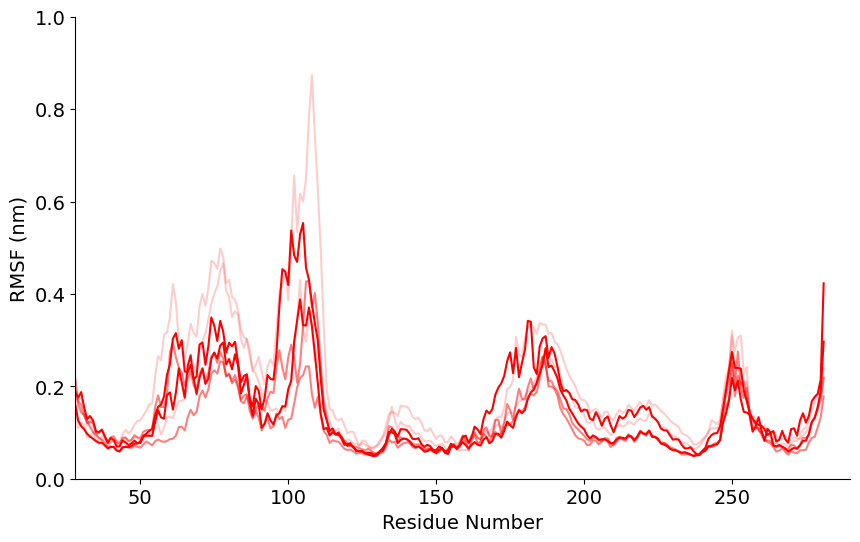

In [5]:
# Create an empty plot
plt.figure(figsize=(10, 6))

# Define colors for the lines
line_color = 'red'  # Color for all lines
alpha_values = [1.0, 0.2, 0.5, 0.5, 0.2, 1.0]  # Different alpha values for each line

# Plot data from each file
for i, file_name in enumerate(file_names):
    # Load the data file containing RMSD/RMSF
    file_data = np.loadtxt(file_name, dtype=float, comments=['#', '$', '@'])  # Load data from the file while ignoring lines starting with '#', '$', or '@'
    
    # Extract Residue (assuming it's in the first column) and RMSF
    residue_number = file_data[:, 0] 
    rmsf = file_data[:, 1]  #RMSF is in the second column
    
    # Plot RMSD Mean with specified color and alpha
    plt.plot(residue_number, rmsf, label=f'{file_name} RMSF', color=line_color, alpha=alpha_values[i % len(alpha_values)])
    # Add blank line breaks where data points repeat
    repeats = np.where(np.diff(residue_number) != 1)[0] + 1
    for repeat_index in repeats:
        plt.plot([residue_number[repeat_index - 1], residue_number[repeat_index]], [rmsf[repeat_index - 1], rmsf[repeat_index]], color=line_color, alpha=0)

    

# Customize the plot
plt.xlabel('Residue Number', fontsize=14)  # Increase font size of x-axis label
plt.ylabel('RMSF (nm)', fontsize=14)  # Increase font size of y-axis label

# Set the font size of axis scale text
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Create a custom legend
legend_elements = [
    plt.Line2D([0], [0], color=line_color, lw=2, alpha=alpha_values[0], label='RMSD 1'),
    plt.Line2D([0], [0], color=line_color, lw=2, alpha=alpha_values[1], label='RMSD 2'),
    plt.Line2D([0], [0], color=line_color, lw=2, alpha=alpha_values[2], label='RMSD 3')
]

# Add the legend to the plot
#plt.legend(handles=legend_elements)

# Remove grid background
plt.grid(False)

# Remove the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set x-axis limits
plt.xlim(28, 290)

# Set y-axis limits
plt.ylim(0, 1.0)

# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

# Ask the user for the output name of the PNG image
output_name = input("Enter the desired name for the output PNG image: ")

# Save the graph as a high-quality PNG image
plt.savefig(output_name + '.png', dpi=300)  # Specify the DPI (dots per inch) for high quality

plt.show()